In [1]:
from nilearn.image import load_img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
from nilearn import image, plotting
from matplotlib import colors

# Atlas
atlas_img = load_img("../data/atlases/shen_2mm_268_parcellation.nii.gz")
shen_rsns = pd.read_csv("../data/atlases/shen_268_parcellation_networklabels.csv")

rsn_ids = np.sort(shen_rsns.Network.unique())

# Order according to network id in increasing order
shen_rsns = shen_rsns.sort_values("Network")

# Add colours to each network (R, G, B)
rsn_colors = [[128,0,128], [0,255,255], [255,215,0], [255,69,0],
              [0,0,128], [255,0,255], [0,255,0], [128,0,0]
             ]
network_labels = dict()
for ii, net_label in zip(rsn_ids, 
                      ['medial-frontal', 'frontoparietal', 'default-mode','subcortical-cerebellum',
                       'motor', 'visual-1', 'visual-2', 'visual-association']):
    network_labels[ii] = net_label

# Number of regions per RSN
n_regions_rsn = shen_rsns.Network.value_counts(sort=False).to_list()

shen_rsn_img_4d = []
for ii in rsn_ids:
    node_ixs = shen_rsns[shen_rsns.Network == ii]["Node"]
    temp = np.zeros_like(atlas_img.get_fdata())
    for nix in node_ixs:
        temp[atlas_img.get_fdata()==nix]=1
    shen_rsn_img_4d.append(image.new_img_like(atlas_img, temp))
shen_rsn_img_4d = image.concat_imgs(shen_rsn_img_4d)

/home/javi/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


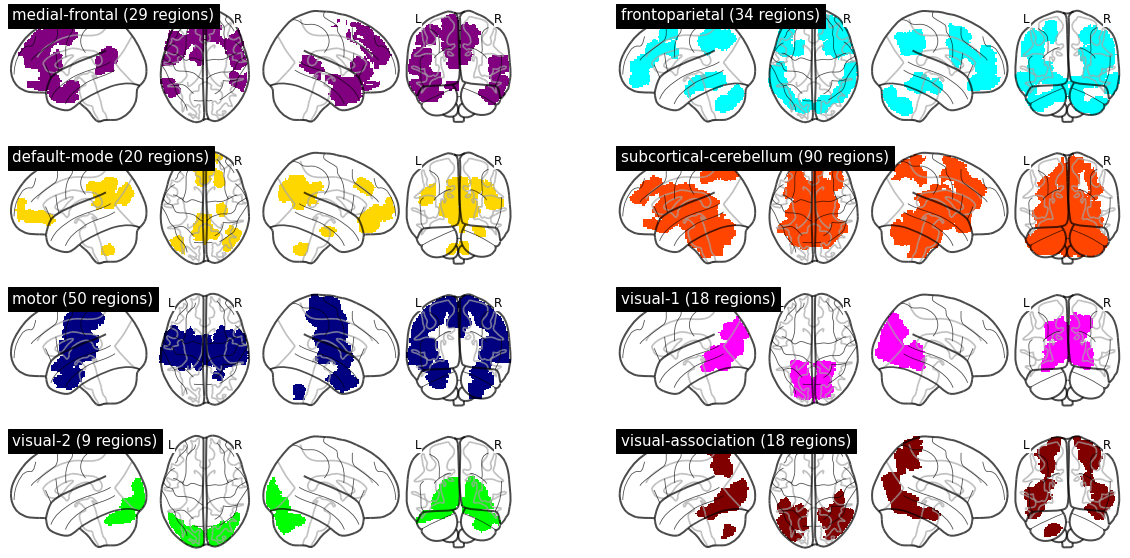

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 10))
axs = axs.flatten()
for ii, label in zip(range(shen_rsn_img_4d.shape[3]), list(network_labels.values())):
    plotting.plot_glass_brain(image.index_img(shen_rsn_img_4d, ii), axes=axs[ii], 
                              title = label + " (%d regions)" % n_regions_rsn[ii], display_mode="lzry",
                              cmap = colors.ListedColormap([col/255 for col in rsn_colors[ii]]))
plt.savefig("../../figures/supp_atlas.png", dpi=300)
plt.savefig("../../figures/supp_atlas.svg", dpi=300)

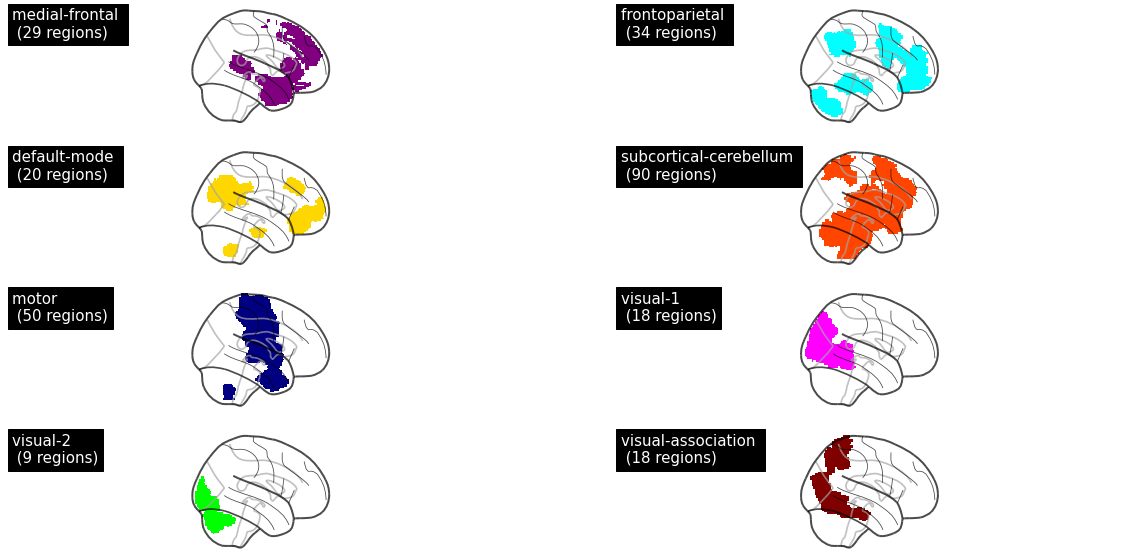

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 10))
axs = axs.flatten()
for ii, label in zip(range(shen_rsn_img_4d.shape[3]), list(network_labels.values())):
    plotting.plot_glass_brain(image.index_img(shen_rsn_img_4d, ii), axes=axs[ii], 
                              title = label + " \n (%d regions)" % n_regions_rsn[ii], display_mode="r",
                              cmap = colors.ListedColormap([col/255 for col in rsn_colors[ii]]))

plt.savefig("../plots/shen_atlas_right_slices.png", dpi=300)
plt.savefig("../plots/shen_atlas_right_slices.svg", dpi=300)